## 문제
- 주어진 데이터(data/insectsprays.csv)에는 여러 지역에서 스프레이를 뿌리기 전에 측정한 곤충의 수와 스프레이를 뿌린 다음의 곤충의 수가 저장되어 있다. 해당 스프레이가 구제 효과가 있는지(즉, 스프레이를 뿌린 뒤 곤충의 수가 감소했는지) 대응(쌍체)표본 t-검정(Paired t-test)을 통해 답하고자 한다.
- 문제 1. before_spr과 after_spr의 차이를 확인하여 diff 변수 로 저장한다.
- 문제 2. 가설을 설정한다. (귀무가설 & 대립가설)
- 문제 3. 정규성을 확인한다.
- 문제 4. 정규성을 만족하면 ttest 진행 후, t_score, p_value값을 구한다.
- 문제 5. 귀무가설 채택/기각 여부를 확인한다.
- 문제 6. pointplot() 그래프를 작성하여 시각화로 차이 여부를 추가로 확인한다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/멀티캠퍼스 국비지원 교육/정지훈 강사님 수업/통계/data'
df = pd.read_csv(DATA_PATH + '/insectsprays.csv')
df

,before_spr,after_spr
0,10,0
1,7,1
2,20,7
3,14,2
4,14,3
5,12,1
6,10,2
7,23,1
8,17,3
9,20,0


### 문제 1. before_spr과 after_spr의 차이를 확인하여 diff 변수 로 저장한다.


In [ ]:
diff = df['after_spr'] - df['before_spr']

In [ ]:
print(diff.mean())

-12.0


### 문제 2. 가설을 설정한다. (귀무가설 & 대립가설)


- 귀무가설: 스프레이를 뿌리기 전후로 곤충의 수 차이는 없다.
- 대립가설: 스프레이를 뿌리기 전후로 곤충의 수 차이는 없지 않다.

강사님이 한 버전
- 귀무가설: 살충제 전후의 평균은 0이다.
- 대립가설: 살충제 전후의 평균은 0이 아니다.

### 문제 3. 정규성을 확인한다.


In [ ]:
df.describe()

,before_spr,after_spr,diff
count,36.000000,36.000000,36.000000
mean,15.500000,3.500000,-12.000000
std,5.068108,2.348252,4.834401
min,7.000000,0.000000,-24.000000
25%,11.750000,2.000000,-13.250000
50%,14.500000,3.000000,-12.000000
75%,19.250000,5.000000,-9.000000
max,26.000000,12.000000,-4.000000


In [ ]:
# 정규성 검정: 표본의 수가 36개 즉, 30개 이상으므로 중심극한정리에 의해 정규성은 있다고 본다.
from scipy import stats
stats.shapiro(df['diff']) # 하지만 실제 검정시 정규분포를 따르지 않는다고 나온다. 오히려 혼란만 가중하므로 굳이 하지 않아도 괜찮다.

ShapiroResult(statistic=0.9238725900650024, pvalue=0.016382716596126556)

### 문제 4. 정규성을 만족하면 ttest 진행 후, t_score, p_value값을 구한다.


In [ ]:
from scipy import stats
t_score, p_value = stats.ttest_rel(df['after_spr'], df['before_spr'])
t_score, p_value # p값이 '1.0227956957398466e-16' 매우 작아 귀무가설을 기각한다.

(-14.893263274163433, 1.0227956957398466e-16)

### 문제 5. 귀무가설 채택/기각 여부를 확인한다.

In [ ]:
if p_value >= 0.05:
    print('귀무가설 채택')
else:
    print('귀무가설 기각')

귀무가설 기각


- 귀무가설을 기각한다.
- 즉, 스프레이를 뿌리기 전후로 곤충의 수는 차이가 없지 않고 통계적으로 유의하다고 본다.

### 문제 6. pointplot() 그래프를 작성하여 시각화로 차이 여부를 추가로 확인한다.

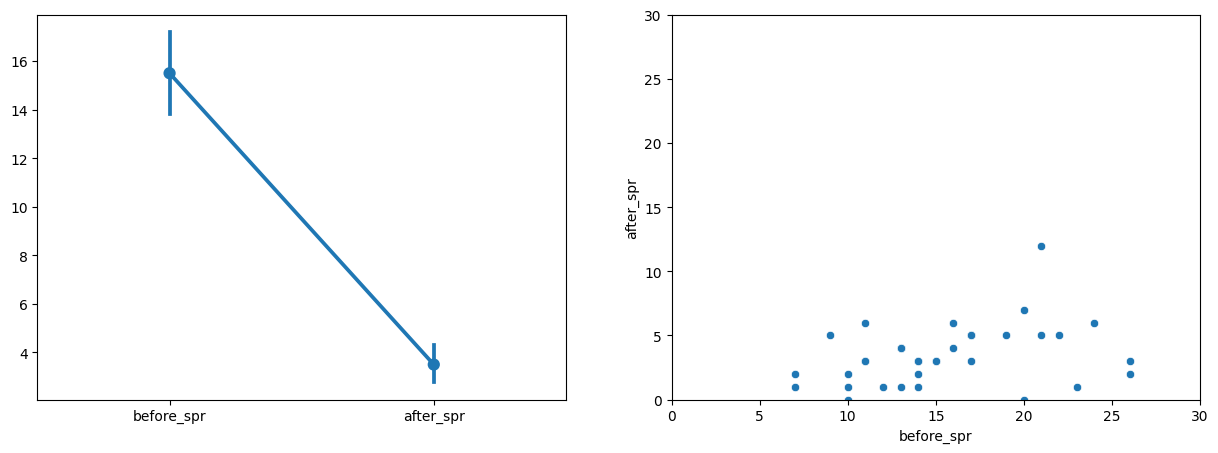

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.pointplot(data = df, ax = ax[0])
sns.scatterplot(data = df, x = 'before_spr', y = 'after_spr', ax = ax[1])

ax[1].set_xlim(0, 30)
ax[1].set_ylim(0,30)

plt.show()